<a href="https://colab.research.google.com/github/Lvisbal/Trading/blob/main/MACD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MACD (Media Móvil de Convergencia/Divergencia)**

El MACD (Media Móvil de Convergencia/Divergencia) es un indicador técnico ampliamente utilizado en el análisis técnico de mercados financieros. Desarrollado por Gerald Appel a finales de la década de 1970, el MACD ayuda a los traders a identificar cambios en la dirección, la fuerza y la duración de una tendencia en el precio de un activo. Este informe proporcionará una descripción detallada y académica del MACD, abordando su cálculo, interpretación, principales características, uso práctico, así como sus ventajas y desventajas.

El MACD se calcula utilizando medias móviles exponenciales (EMA) de diferentes períodos de tiempo. Los componentes básicos del cálculo son:

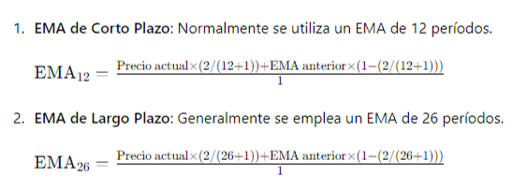

Una vez calculados estos dos EMAs, se obtiene el MACD restando el EMA de largo plazo del EMA de corto plazo:

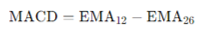

Además del MACD, se calcula la Línea de Señal, que es un EMA de la diferencia entre el MACD y su propia EMA, típicamente utilizando 9 períodos:

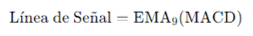

El MACD se interpreta mediante varios métodos:

**Cruces del MACD y la Línea de Señal:** Un cruce alcista (cuando el MACD cruza por encima de la Línea de Señal) sugiere una posible señal de compra. Un cruce bajista (cuando el MACD cruza por debajo de la Línea de Señal) indica una posible señal de venta.

**Histograma del MACD:** El histograma se deriva de la diferencia entre el MACD y la Línea de Señal, proporcionando una representación visual de la distancia entre estas dos líneas y ayudando a evaluar la fuerza y la dirección de la tendencia.

**Principales Características**
Sensibilidad al Precio: Debido a su uso de EMAs, el MACD es sensible a los cambios de precio recientes.

**Flexibilidad:** Puede ajustarse modificando los períodos de EMA según el marco de tiempo y la volatilidad del activo.

**Uso en Divergencias:** Las divergencias entre el MACD y el precio del activo pueden indicar posibles cambios en la dirección de la tendencia.

**Uso del MACD**
El MACD es utilizado por traders para:

Confirmación de Tendencias: Identificar y confirmar la dirección de una tendencia predominante.

Señales de Entrada y Salida: Generar señales de compra y venta basadas en los cruces del MACD y la Línea de Señal.

Filtrado de Señales: Utilizar el histograma para filtrar señales más precisas, observando la convergencia o divergencia entre el precio y el MACD.

Ventajas y Desventajas
Ventajas:
Facilidad de Uso: Es relativamente sencillo de entender y aplicar, incluso para traders principiantes.

Visualización Clara: Las señales generadas por el MACD son visuales y fáciles de interpretar.

Flexibilidad: Puede utilizarse en conjunto con otros indicadores técnicos para mejorar la precisión de las decisiones de trading.

Desventajas:
Señales Falsas: Puede generar señales falsas durante períodos de mercado lateral o de baja volatilidad.

Retraso en las Señales: El MACD puede ser lento para reaccionar a cambios rápidos en la dirección del precio.

Conclusión
El MACD es una herramienta esencial en el análisis técnico debido a su capacidad para proporcionar señales claras de compra y venta, confirmar tendencias y filtrar movimientos del precio. No obstante, como cualquier herramienta técnica, su eficacia depende del contexto del mercado y es recomendable utilizarlo en conjunto con otros indicadores y análisis para tomar decisiones informadas y prudentes en el trading.

En este informe, se exploraron los fundamentos del MACD, su cálculo, interpretación, características clave, uso práctico, así como sus ventajas y desventajas en el contexto del análisis técnico de activos financieros.

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Obtener datos de precios de MSFT desde Yahoo Finance
ticker = 'MSFT'
data = yf.download(ticker, start='2024-01-01', end='2024-07-15')

# Seleccionar solo los precios de cierre ajustados
df = data['Adj Close'].to_frame()

[*********************100%%**********************]  1 of 1 completed


In [5]:
# Calcular el EMA de corto plazo (12 períodos)
short_ema = df['Adj Close'].ewm(span=12, adjust=False).mean()

# Calcular el EMA de largo plazo (26 períodos)
long_ema = df['Adj Close'].ewm(span=26, adjust=False).mean()

# Calcular el MACD
macd = short_ema - long_ema

# Calcular la Línea de Señal (9 períodos)
signal_line = macd.ewm(span=9, adjust=False).mean()

# Calcular el Histograma
histogram = macd - signal_line


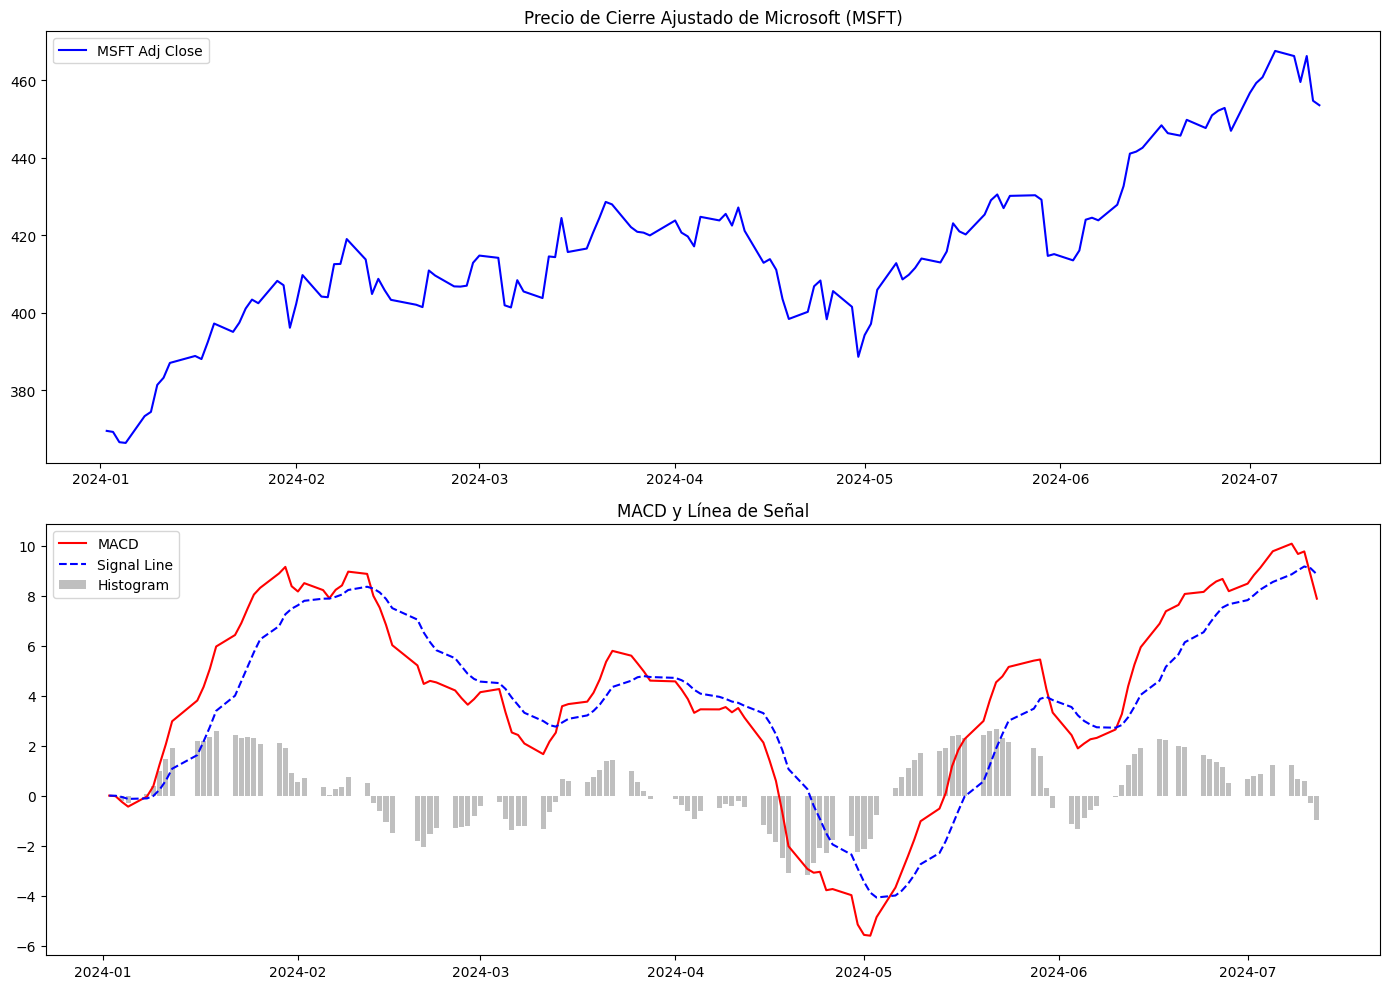

In [7]:
# Crear una figura y ejes
plt.figure(figsize=(14,10))

# Gráfico del precio de cierre ajustado de MSFT
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Adj Close'], label='MSFT Adj Close', color='blue')
plt.title('Precio de Cierre Ajustado de Microsoft (MSFT)')
plt.legend()

# Gráfico del MACD y la Línea de Señal
plt.subplot(2, 1, 2)
plt.plot(df.index, macd, label='MACD', color='red', linestyle='-')
plt.plot(df.index, signal_line, label='Signal Line', color='blue', linestyle='--')
plt.bar(df.index, histogram, label='Histogram', color='grey', alpha=0.5)
plt.title('MACD y Línea de Señal')
plt.legend()

# Ajustes de diseño y espaciado
plt.tight_layout()
plt.show()